## Model Training

### Import Data and Required packages

In [9]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [10]:
df = pd.read_csv('student_habits_performance.csv')

In [11]:
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [12]:
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
df['study_sleep_ratio'] = df['study_hours_per_day'] / df['sleep_hours']
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,total_screen_time,study_sleep_ratio
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3,0.000000
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1,1.500000
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4,0.175000
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9,0.108696
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9,1.020408


#### Preparing X and Y variables

In [13]:
df.drop(columns=['student_id'], axis = 1, inplace = True)

In [14]:
X = df.drop(columns =['exam_score'], axis =1) # Features
y = df['exam_score'] # Target 

In [15]:
X.head(3)

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,total_screen_time,study_sleep_ratio
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,2.3,0.000
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,5.1,1.500
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,4.4,0.175


In [16]:
y.head(3)

0     56.2
1    100.0
2     34.3
Name: exam_score, dtype: float64

In [17]:
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist() 
numerical_features

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'total_screen_time',
 'study_sleep_ratio']

In [18]:
categorical_features = [feature for feature in X.columns if X[feature].dtype == 'O']
categorical_features

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

CHecking unique categories inside categorical features

In [19]:
for feature in categorical_features:
    print(f"{feature} has {X[feature].unique()} categories")

gender has ['Female' 'Male' 'Other'] categories
part_time_job has ['No' 'Yes'] categories
diet_quality has ['Fair' 'Good' 'Poor'] categories
parental_education_level has ['Master' 'High School' 'Bachelor' nan] categories
internet_quality has ['Average' 'Poor' 'Good'] categories
extracurricular_participation has ['Yes' 'No'] categories


Creating pipeline for Onehotencoding and Scalar

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessing = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, categorical_features),
        ('StandardScaler', numeric_transformer, numerical_features),
    ]
)

In [21]:
X = preprocessing.fit_transform(X)

In [22]:
X.shape

(1000, 27)

In [23]:
# Seprate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state= 42)
X_train.shape, X_test.shape

((800, 27), (200, 27))

#### Create an Evaluate Function to give all metrics after model Training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3401
- Mean Absolute Error: 4.2095
- R2 Score: 0.9023
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1509
- Mean Absolute Error: 4.2082
- R2 Score: 0.8965


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.9037
- Mean Absolute Error: 4.6947
- R2 Score: 0.8806
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7326
- Mean Absolute Error: 4.6339
- R2 Score: 0.8718


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3404
- Mean Absolute Error: 4.2100
- R2 Score: 0.9023
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.1549
- Mean Absolute Error: 4.2157
- R2 Score: 0.8964


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.0111
- Mean Absolute Error: 5.6370
- R2 Score: 0.8315
-----------------------

Results

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', "R2 Score"]).sort_values(by=['R2 Score'], ascending = True)

,Model Name,R2 Score
4,Decision Tree,0.688982
3,K-Neighbors Regressor,0.694603
8,AdaBoost Regressor,0.808156
6,XGBRegressor,0.838450
5,Random Forest Regressor,0.857565
1,Lasso,0.871844
7,CatBoosting Regressor,0.886281
2,Ridge,0.896374
0,Linear Regression,0.896535


Linear Regression

In [29]:
lin_model = LinearRegression(fit_intercept= True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 89.65


## Plot y_pred and y_test

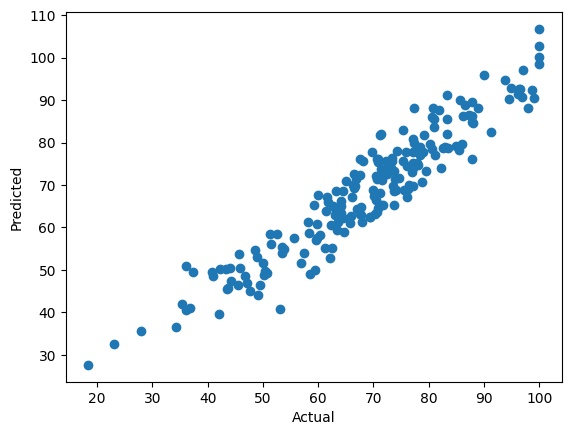

In [31]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

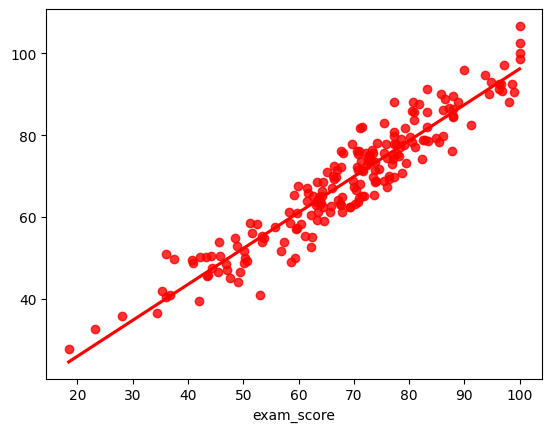

In [32]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [33]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,64.2,66.266396,-2.066396
737,72.7,75.078580,-2.378580
740,79.0,77.691938,1.308062
660,79.5,73.314674,6.185326
411,58.2,61.307429,-3.107429
...,...,...,...
408,34.3,36.528197,-2.228197
332,71.2,68.074742,3.125258
208,75.8,77.796232,-1.996232
613,85.7,90.054503,-4.354503
